In [1]:
pip install scikit-learn matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

import json 

In [3]:
import os

feature_classes = ""

with open('class_indices.json', 'r') as file:
    feature_classes = {v: k for k, v in json.load(file).items()}
    print(feature_classes)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Background_without_leaves', 5: 'Blueberry___healthy', 6: 'Cherry___Powdery_mildew', 7: 'Cherry___healthy', 8: 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 9: 'Corn___Common_rust', 10: 'Corn___Northern_Leaf_Blight', 11: 'Corn___healthy', 12: 'Grape___Black_rot', 13: 'Grape___Esca_(Black_Measles)', 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 15: 'Grape___healthy', 16: 'Orange___Haunglongbing_(Citrus_greening)', 17: 'Peach___Bacterial_spot', 18: 'Peach___healthy', 19: 'Pepper,_bell___Bacterial_spot', 20: 'Pepper,_bell___healthy', 21: 'Potato___Early_blight', 22: 'Potato___Late_blight', 23: 'Potato___healthy', 24: 'Raspberry___healthy', 25: 'Soybean___healthy', 26: 'Squash___Powdery_mildew', 27: 'Strawberry___Leaf_scorch', 28: 'Strawberry___healthy', 29: 'Tomato___Bacterial_spot', 30: 'Tomato___Early_blight', 31: 'Tomato___Late_blight', 32: 'Tomato___Leaf_Mold', 33: 'Tomato___S

In [4]:
model = tf.keras.models.load_model('../Agents/Image Classifier/PlantVillage_MobileNet_Model.keras')

In [5]:
model

<Functional name=PlantVillage_MobileNet_Model, built=True>

In [6]:
base_dir = "../../Datasets/PlantVillage(Arguemnted)"
test_dir = os.path.join(base_dir,"test")
image_size = 224
batch_size = 32

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (image_size, image_size),
                                             batch_size = batch_size,
                                             class_mode = "categorical",
                                             shuffle=False)

Found 9243 images belonging to 39 classes.


In [7]:
ytrue = [feature_classes[i] for i in test_data.classes]

In [8]:
pred = model.predict(test_data, verbose=0)

In [9]:
ypred = [feature_classes[i] for i in np.argmax(pred, axis=1)]

In [10]:
ypred

['Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___healthy',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Tomato___Late_blight',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Cedar_apple_rust',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Apple___Apple_sc

In [11]:
cls = list(feature_classes.values())

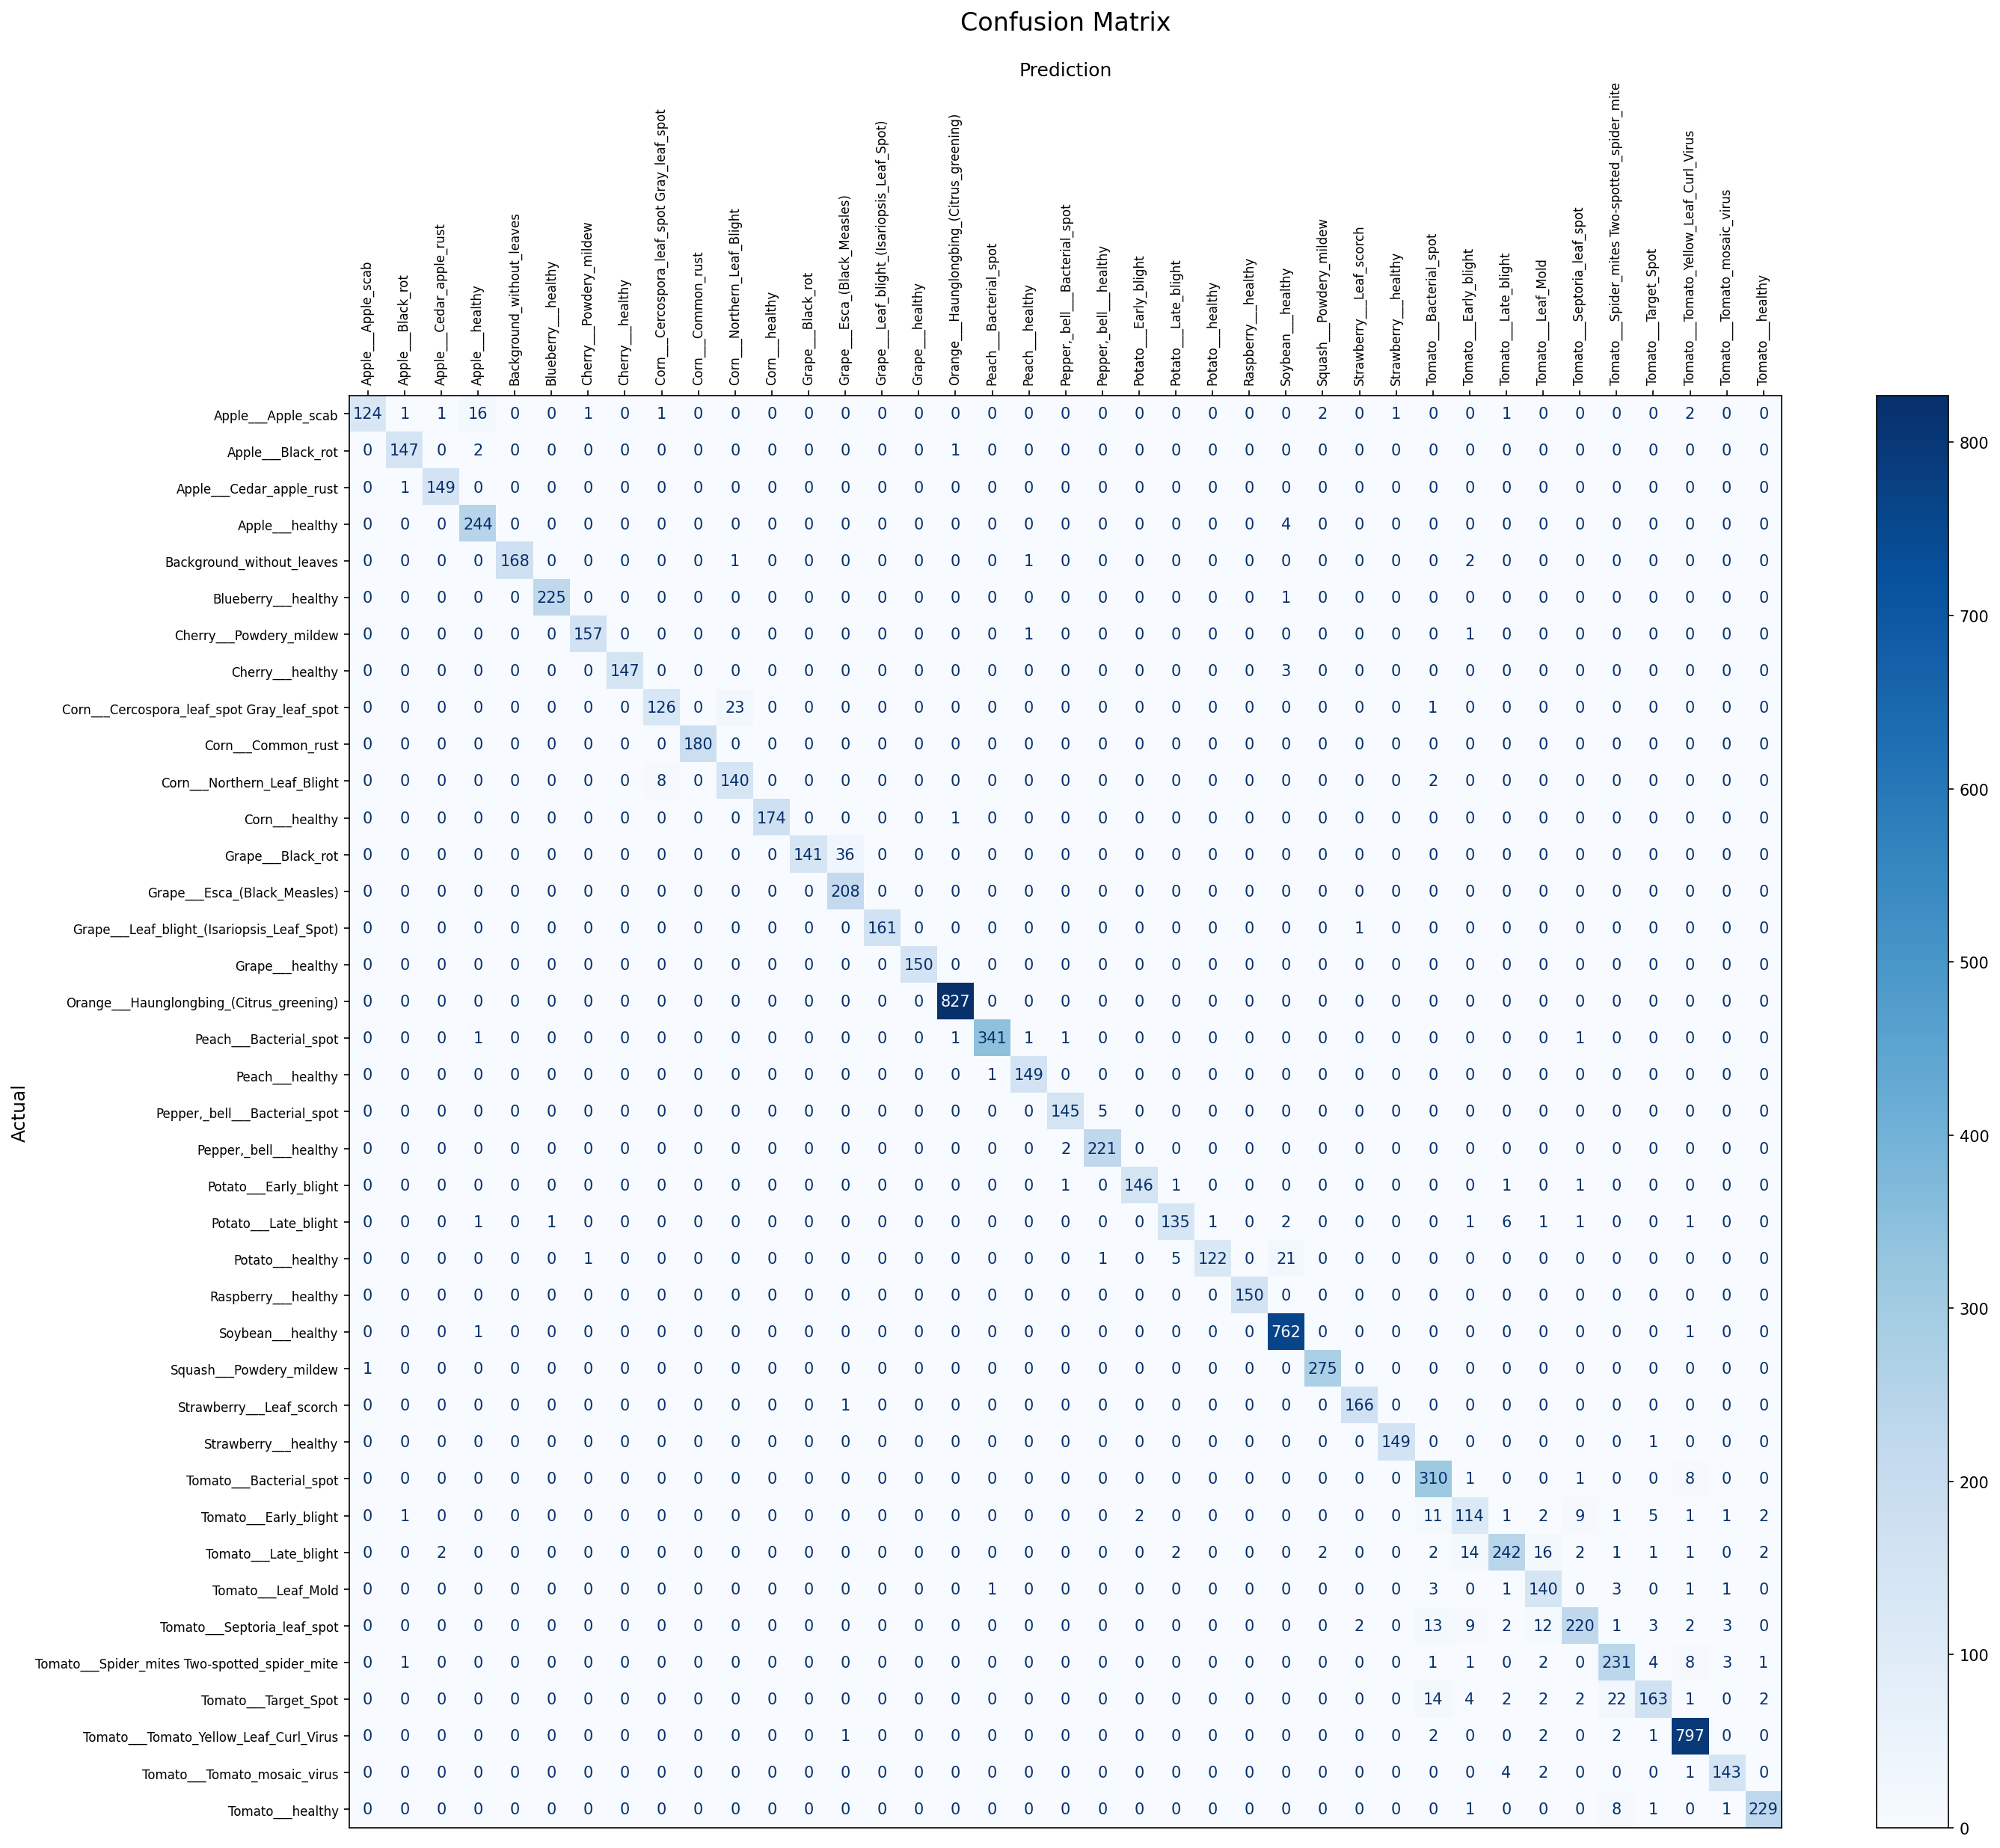

In [14]:
cm = confusion_matrix(ytrue, ypred, labels=cls)
fig, ax = plt.subplots(figsize=(18, 14), dpi=150)        
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls)
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation=90, values_format='d')  
ax.set_title('Confusion Matrix', fontsize=16, pad=20)
ax.set_xlabel('Prediction', fontsize=12)

ax.set_ylabel('Actual', fontsize=12)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()

ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
plt.subplots_adjust(left=0.24, right=0.98, top=0.88, bottom=0.28)  

plt.tight_layout()
plt.xticks(rotation=90) 
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(ytrue, ypred)
prec = precision_score(ytrue, ypred, average='macro')
rec = recall_score(ytrue, ypred, average='macro')
f1 = f1_score(ytrue, ypred, average='macro')

print(f"Accuracy:{acc}, Precision:{prec}, Recall:{rec}, F1 Score:{f1}")

Accuracy:0.9540192578167261, Precision:0.9529949912367537, Recall:0.9435480844782742, F1 Score:0.9466512178864814
